In [1]:
NUMBER = 50
WYMIAR = 50


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.decomposition import PCA as sklearnPCA


In [2]:
# KOD 1 - generacja danych

import numpy as np


mu_vec1 = np.zeros((WYMIAR,), dtype=np.int)
cov_mat1 = np.zeros((WYMIAR, WYMIAR), int)
np.fill_diagonal(cov_mat1, 1)
# print(cov_mat1)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, NUMBER).T
assert class1_sample.shape == (WYMIAR,NUMBER), "The matrix has not the dimensions 3x20"


mu_vec2 = np.ones((WYMIAR,), dtype=np.int)
mu_vec2 = mu_vec2
cov_mat2 = np.zeros((WYMIAR, WYMIAR), int)
np.fill_diagonal(cov_mat2, 1)
# print(cov_mat2)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, NUMBER).T
assert class2_sample.shape == (WYMIAR,NUMBER), "The matrix has not the dimensions 3x20"


# konkatenacja danych (przy liczeniu PCA nie zwracamy uwagi na klasę...)

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (WYMIAR,NUMBER*2), "The matrix has not the dimensions 3x40"

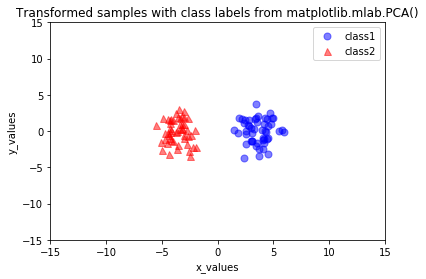

In [3]:
# sKA 2D

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:NUMBER,0],sklearn_transf[0:NUMBER,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER*2,0], sklearn_transf[NUMBER:NUMBER*2,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

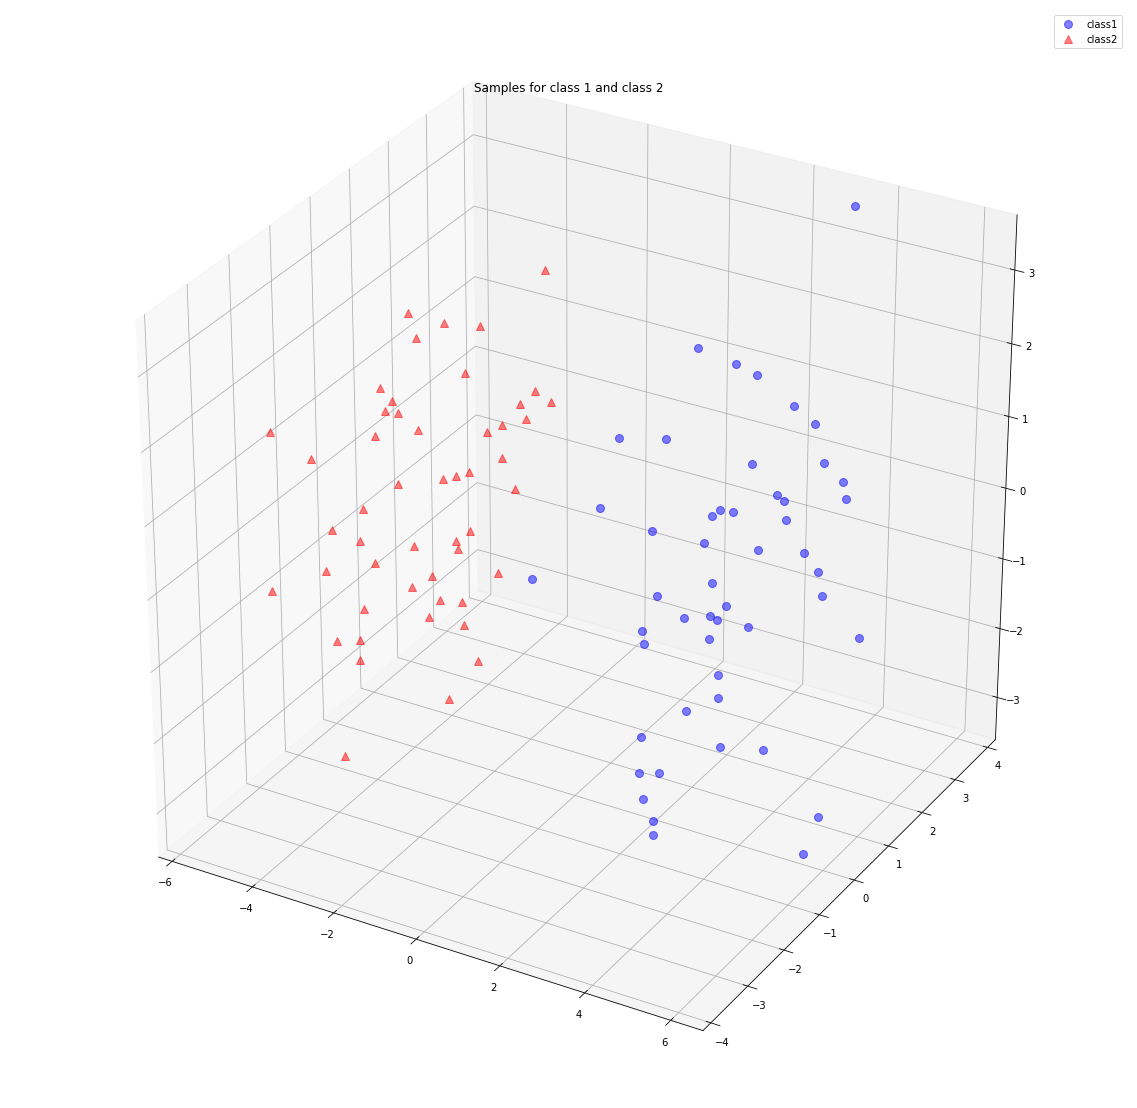

In [4]:
# KOD 2 - zwizualizowanie

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(sklearn_transf[0:NUMBER,0],sklearn_transf[0:NUMBER,1],sklearn_transf[0:NUMBER,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(sklearn_transf[NUMBER:NUMBER*2,0],sklearn_transf[NUMBER:NUMBER*2,1],sklearn_transf[NUMBER:NUMBER*2,2], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()